# Table of Contents for Task # 2 on 4.9 Intro to data visualization
    Import libraries, set path, import files (orders_products_customers.pkl)
    Perform checks (shape, columns, head)
    Create a histogram of 'order_hour_of_day'
        Save as hist_2
        Export as hist_order_hour_of_day.png
    Create a bar chart for 'loyalty_flag'
        Save as bar_2
        Export as bar_loyalty_flag.png
    Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
        Create a random sample 70/30
        Make subset df_2 with columns 'order_hour_of_day','prices'
        Create the line chart prices vs. order_hour_of_day 
            Save as line
            Export as line_prices_hour.png
    Create the line chart age vs n_dependants using another subset from sampling
        Use subset df_3 with age and n_dependants
        Create the line chart as line_2
        Export it as line_age_dependants.png
    Create a scatterplot to find if there is a connection between age and spending power (income)
        Save as scatter
        Export as scatter_age_income.png

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set path

In [2]:
path = r'C:\Users\valev\Desktop\0325 Instacart Basket Analysis'

# Import files

In [3]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl' ))

In [4]:
df_final.shape

(32404859, 30)

In [5]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spent', 'spending_flag',
       'median_days_since_orders', 'order_frequency_flag', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [6]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_days_since_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,1107,38259,2,1,11,...,30.0,Non-frequent customer,Female,District of Columbia,68,6/30/2019,2,married,142744,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,5319,196224,65,1,14,...,1.0,Frequent customer,Male,New York,48,4/29/2018,2,married,43906,both
2,1,Chocolate Sandwich Cookies,61,19,5.800781,7540,138499,8,0,14,...,7.0,Frequent customer,Female,Massachusetts,31,3/11/2017,2,married,78505,both
3,1,Chocolate Sandwich Cookies,61,19,5.800781,9228,79603,2,2,10,...,30.0,Non-frequent customer,Male,Tennessee,65,10/27/2019,1,married,51010,both
4,1,Chocolate Sandwich Cookies,61,19,5.800781,9273,50005,1,1,15,...,7.0,Frequent customer,Male,New Jersey,75,4/9/2019,3,married,115468,both


# Create a histogram of 'order_hour_of_day'

<Axes: ylabel='Frequency'>

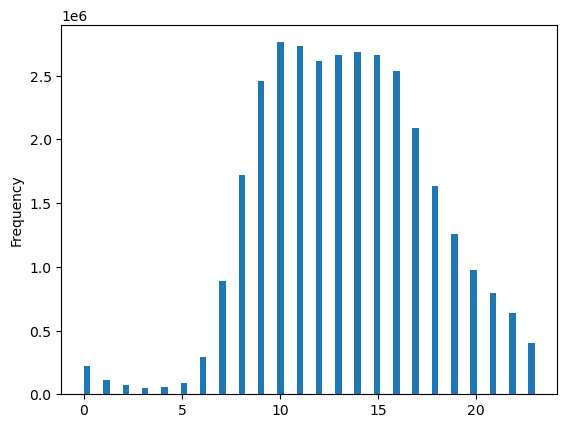

In [7]:
df_final['order_hour_of_day'].plot.hist(bins = 70)

## The histogram above represents the number of times that orders are placed in a specific time of day.  The x-axis represents hours from 0 (midnight) to 23 (11pm).  Most orders are placed at 10am and most orders are placed between 9am and 5pm.

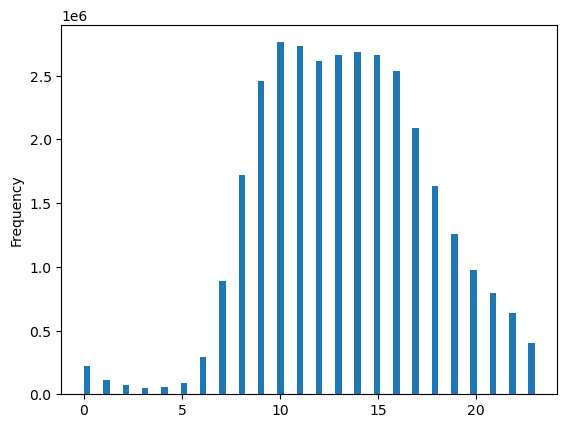

In [8]:
# Save within a hist
hist_2 = df_final['order_hour_of_day'].plot.hist(bins = 70)

In [9]:
# Export 
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

# Create a bar chart for 'loyalty_flag'

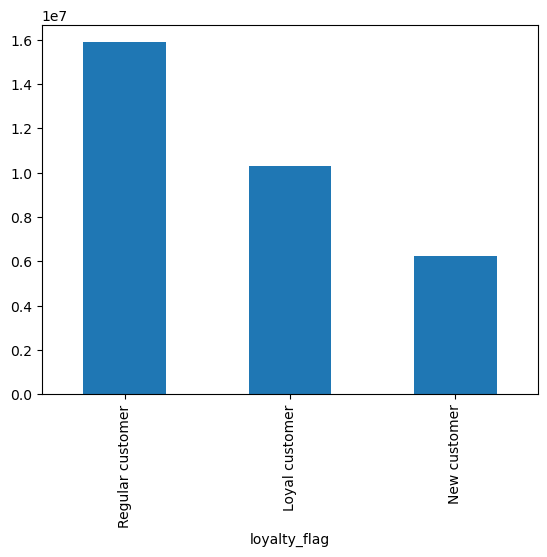

In [10]:
bar_2 = df_final['loyalty_flag'].value_counts().plot.bar()

In [11]:
# Export 
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

## Create a sampling subset first

In [12]:
# Set the seed
np.random.seed(5)

In [13]:
# Create the list of True or False values to test the random sample
dev = np.random.rand(len(df_final)) <= 0.7

In [14]:
# Store 70% in the dataframe big 
big = df_final[dev]

In [15]:
# Store 30% in the dataframe small
small = df_final[~dev]

In [16]:
# Check len
len(df_final)

32404859

In [17]:
#Check against big + small
len(big) + len(small)

32404859

## Create the subset with only columns for line chart

In [18]:
df_2 = small[['order_hour_of_day','prices']]

In [19]:
df_2.shape

(9721931, 2)

In [20]:
df_2.head()

,order_hour_of_day,prices
1,14,5.800781
3,10,5.800781
6,14,5.800781
11,10,5.800781
14,19,5.800781


## Create the line chart prices vs. order_hour_of_day

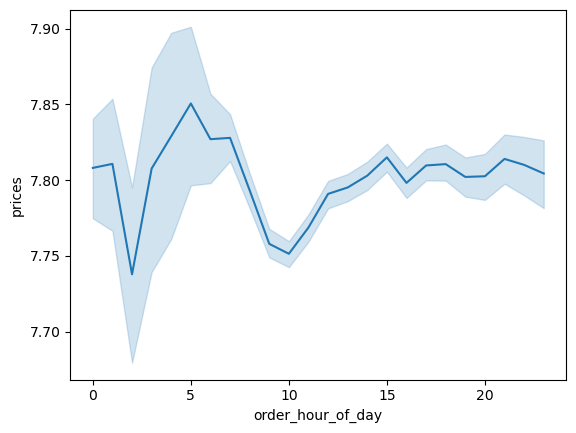

In [21]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [22]:
# Export 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour.png'))

# Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

## Create the line chart age vs n_dependants using another subset from sampling

In [23]:
df_3 = small[['Age','n_dependants']]

In [24]:
df_3.shape

(9721931, 2)

In [25]:
df_3.head()

,Age,n_dependants
1,48,2
3,65,1
6,37,1
11,18,0
14,75,1


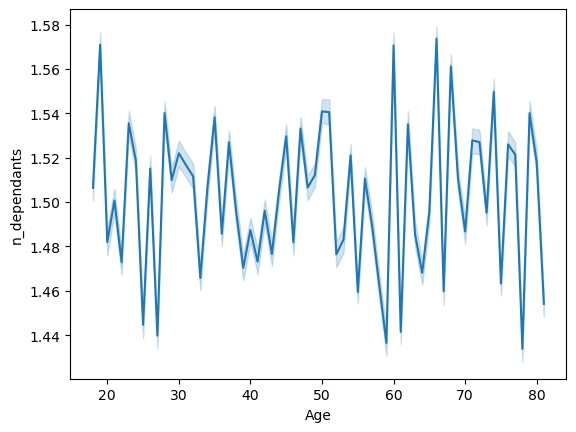

In [26]:
# Creat line chart
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

### The above line chart shows that most users regardless of age have a median 1.5 number of dependants

In [27]:
# Export 
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

# Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

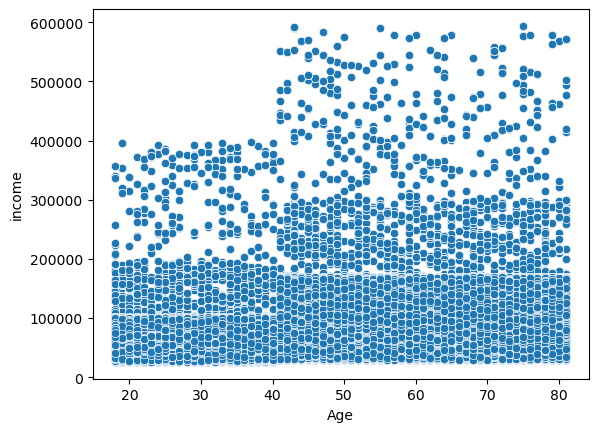

In [28]:
scatter = sns.scatterplot(x = 'Age', y = 'income',data = df_final)

## The scatterplot above shows that users above the age of 40 can have higher incomes, however, ages zero through 40 hold more incomes of 300K to 400K, nonetheless ages above 40 have a denser plot, which would be most users with better incomes.

In [29]:
# Export 
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))